In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("hotel.csv")
data.head(10)

,Date,Name,Mode_of_Order,Rating,Total_Bill,Discount,Net_Pay,Mode_of_Eating
0,2024-03-08,Sunset Diner,Online,4.8/5,3644.04,23.38,2792.06,Lunch
1,2024-06-25,Golden Fork,Walk-in,3.8/5,2019.16,24.25,1529.51,Dining
2,2024-08-29,Royal Feast,Online,4.5/5,2737.19,12.69,2389.84,Dining
3,2024-04-19,Royal Feast,Takeaway,3.9/5,2500.51,11.26,2218.95,Lunch
4,2025-01-30,Tandoori Flames,Online,4.8/5,1677.10,26.95,1225.12,Lunch
5,2025-01-09,Tandoori Flames,Walk-in,4.6/5,4425.37,21.52,3473.03,Brunch
6,2024-12-10,Tandoori Flames,Online,4.0/5,2786.02,13.31,2415.20,Dinner
7,2024-09-07,Fusion Flavors,Online,4.6/5,535.58,14.94,455.56,Dinner
8,2024-03-30,Bistro Delight,Online,4.1/5,486.48,7.00,452.43,Breakfast
9,2024-12-20,The Urban Eatery,Online,4.4/5,4889.40,16.20,4097.32,Dining


# 1.About The Data

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5000 non-null   object 
 1   Name            5000 non-null   object 
 2   Mode_of_Order   5000 non-null   object 
 3   Rating          5000 non-null   object 
 4   Total_Bill      5000 non-null   float64
 5   Discount        5000 non-null   float64
 6   Net_Pay         5000 non-null   float64
 7   Mode_of_Eating  5000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 312.6+ KB


In [250]:
data.isnull().sum().sum()

np.int64(0)

In [251]:
data.duplicated().sum()

np.int64(0)

In [252]:
data.describe()

,Total_Bill,Discount,Net_Pay
count,5000.000000,5000.000000,5000.000000
mean,2560.017972,17.509740,2111.065866
std,1390.862586,7.221933,1168.233828
min,200.980000,5.000000,150.090000
25%,1347.375000,11.330000,1108.510000
50%,2526.535000,17.455000,2040.945000
75%,3758.942500,23.780000,3079.405000
max,4999.250000,29.990000,4708.140000


# 2. Data Type Casting

In [253]:
data['Date']=pd.to_datetime(data['Date'])
data['Rating'] = data['Rating'].astype(str).str.split('/').str[0].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5000 non-null   datetime64[ns]
 1   Name            5000 non-null   object        
 2   Mode_of_Order   5000 non-null   object        
 3   Rating          5000 non-null   float64       
 4   Total_Bill      5000 non-null   float64       
 5   Discount        5000 non-null   float64       
 6   Net_Pay         5000 non-null   float64       
 7   Mode_of_Eating  5000 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 312.6+ KB


#                                                                                3. Task 

# i.calculate and visualize the average discount given by the hotel

Average Discount Given to Each Customer:
 Name
Bistro Delight      18.037820
Crispy Cravings     17.498966
Fusion Flavors      17.731365
Golden Fork         17.854520
Ocean Breeze        17.056554
Royal Feast         17.713360
Spice Haven         17.487462
Sunset Diner        17.040591
Tandoori Flames     17.325325
The Urban Eatery    17.418937
Name: Discount, dtype: float64


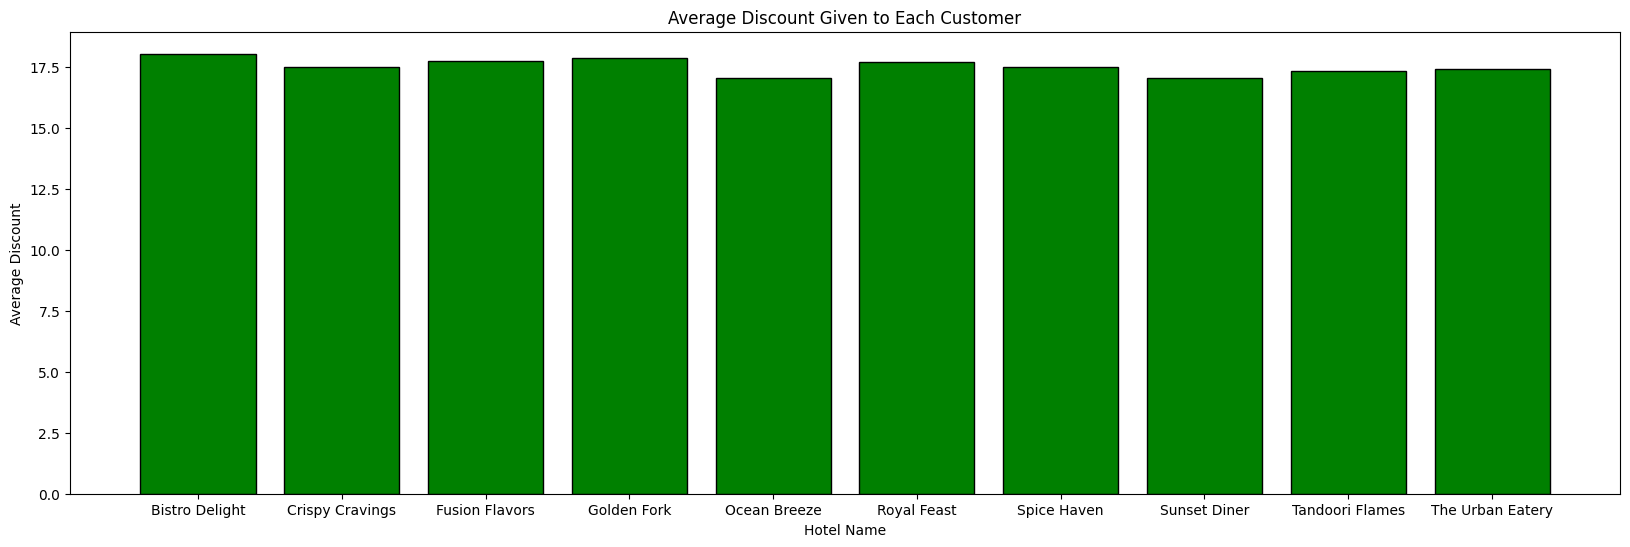

In [265]:
# Grouping the data by 'Name' and calculating the average discount 
avg_discount = data.groupby(['Name'])['Discount'].mean()

# Display the calculated average discount values
print("Average Discount Given to Each Customer:\n", avg_discount)

# Plotting the results using a bar chart
plt.figure(figsize=(20, 6))
plt.bar(avg_discount.index, avg_discount.values, color='green', edgecolor='black')

# Adding labels and title for better clarity
plt.xlabel("Hotel Name")
plt.ylabel("Average Discount")
plt.title("Average Discount Given to Each Customer")
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability

# Display the plot
plt.show()


# ii. calculate and visualize the average rating given to each hotel?

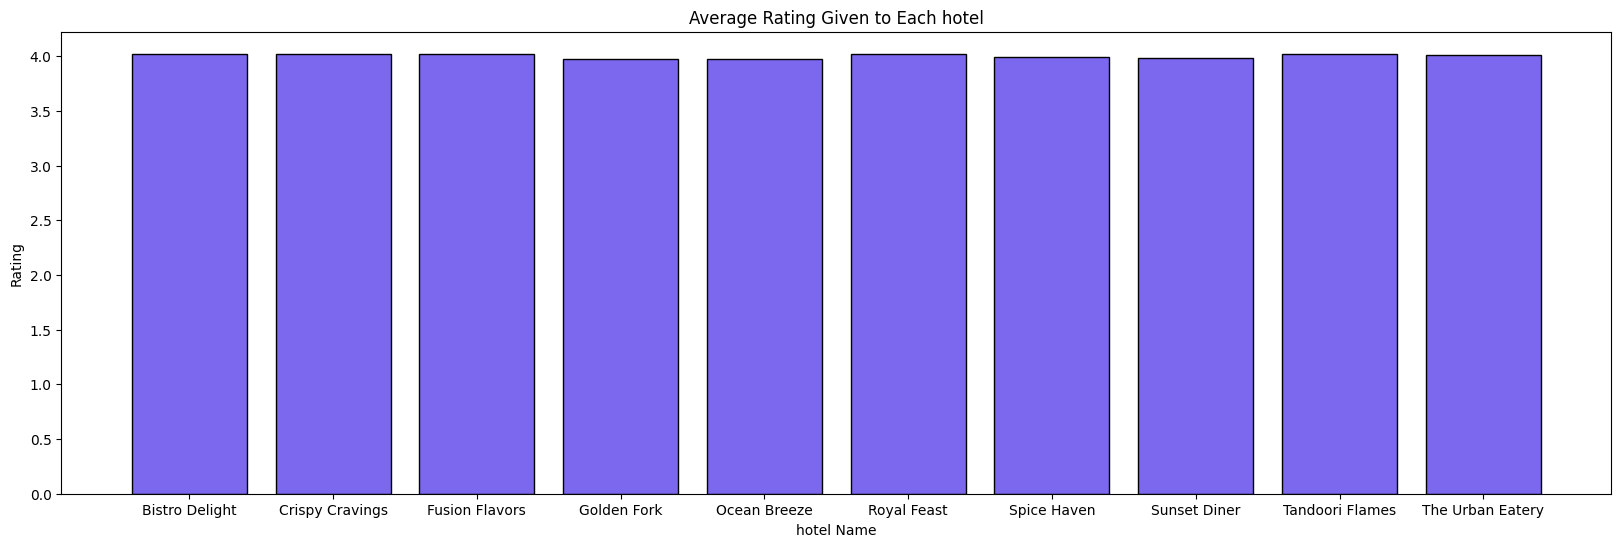

Name
Bistro Delight      4.022000
Crispy Cravings     4.022785
Fusion Flavors      4.022691
Golden Fork         3.978200
Ocean Breeze        3.971563
Royal Feast         4.021996
Spice Haven         3.989247
Sunset Diner        3.985397
Tandoori Flames     4.017886
The Urban Eatery    4.009843
Name: Rating, dtype: float64

In [258]:
# Grouping the data by 'Name' and calculating the average rating for each hotel
avg_rating = data.groupby('Name')['Rating'].mean()

# Creating the bar chart with improved readability
plt.figure(figsize=(20, 6))
plt.bar(avg_rating.index, avg_rating.values, color='mediumslateblue', edgecolor='black')

# Adding labels and title for better clarity
plt.xlabel("hotel Name")
plt.ylabel("Rating")
plt.title("Average Rating Given to Each hotel")
plt.xticks(rotation=0)  # Rotating labels for better visibility

# Display the plot
plt.show()
avg_rating

# iii.analyze and visualize the number of orders placed by each customer based on their mode of order?

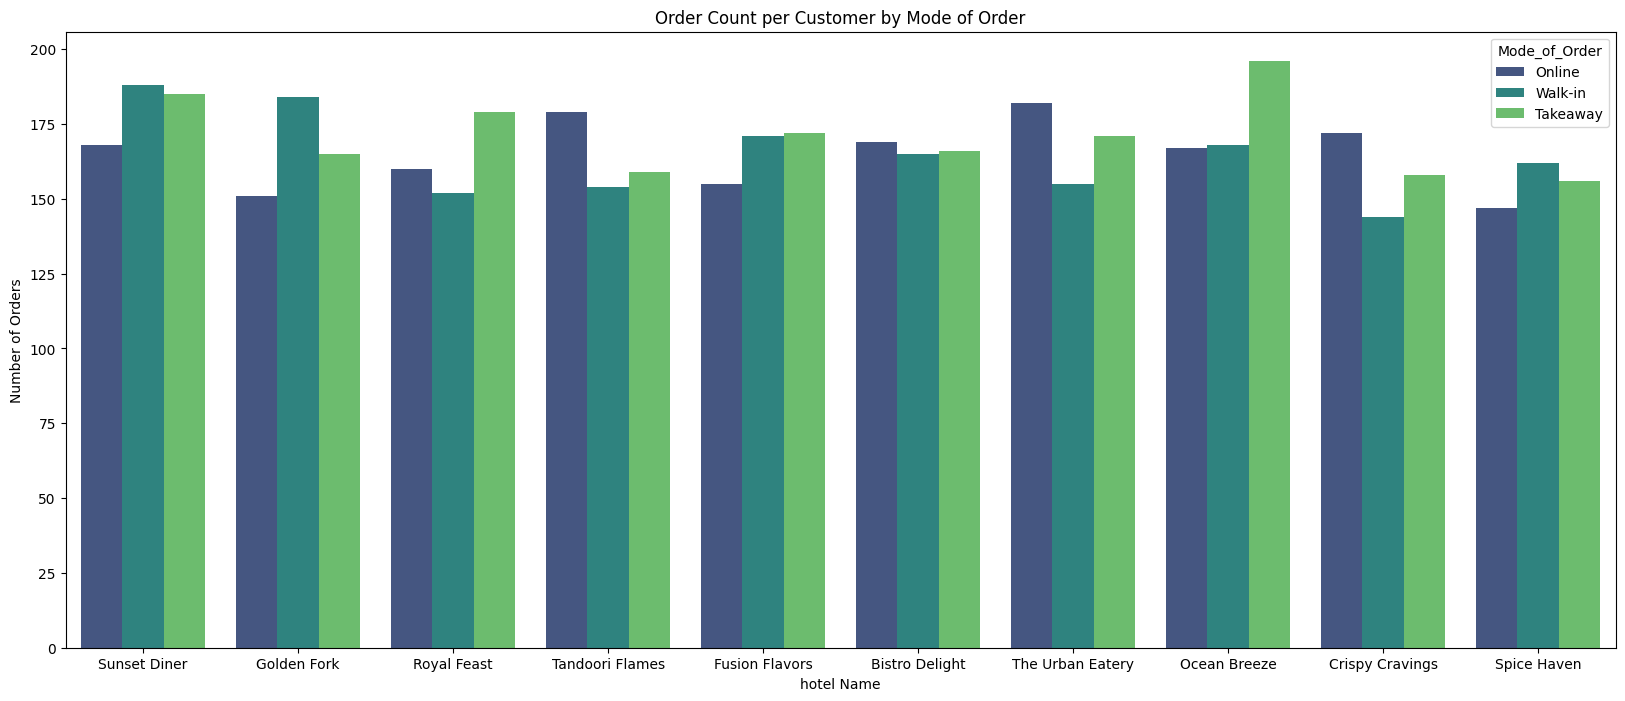

Name            Mode_of_Order
Bistro Delight  Online           169
                Takeaway         166
                Walk-in          165
Name: Date, dtype: int64

In [262]:
# Grouping data by 'Name' and 'Mode_of_Order' to count the number of orders
order_count = data.groupby(['Name', 'Mode_of_Order'])['Date'].count()

# Plotting the count of orders for each customer based on Mode_of_Order
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Name', hue='Mode_of_Order', palette='viridis')

# Adding labels and title for better clarity
plt.xlabel("hotel Name")
plt.ylabel("Number of Orders")
plt.title("Order Count per Customer by Mode of Order")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()
order_count.head(3)

# iv.visualize the distribution of orders for each customer based on their mode of eating?

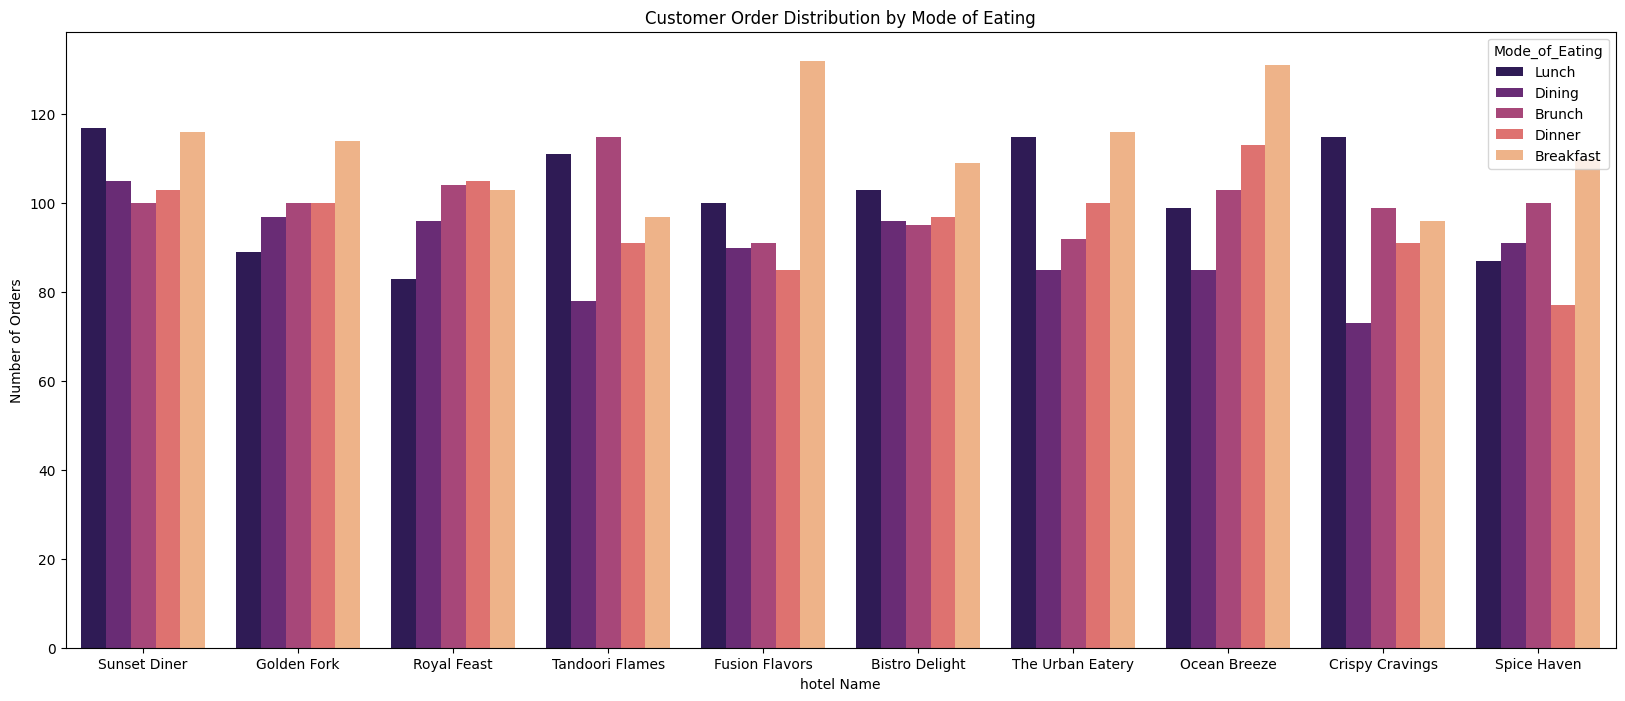

In [263]:
# Creating a count plot to visualize orders per customer by Mode of Eating
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Name', hue='Mode_of_Eating', palette='magma')

# Adding labels and title for clarity
plt.xlabel("hotel Name")
plt.ylabel("Number of Orders")
plt.title("Customer Order Distribution by Mode of Eating")
plt.xticks(rotation=0)  # Rotating labels for better readability

# Display the plot
plt.show()

# v.calculate and visualize the total bill and net payment for each holet?

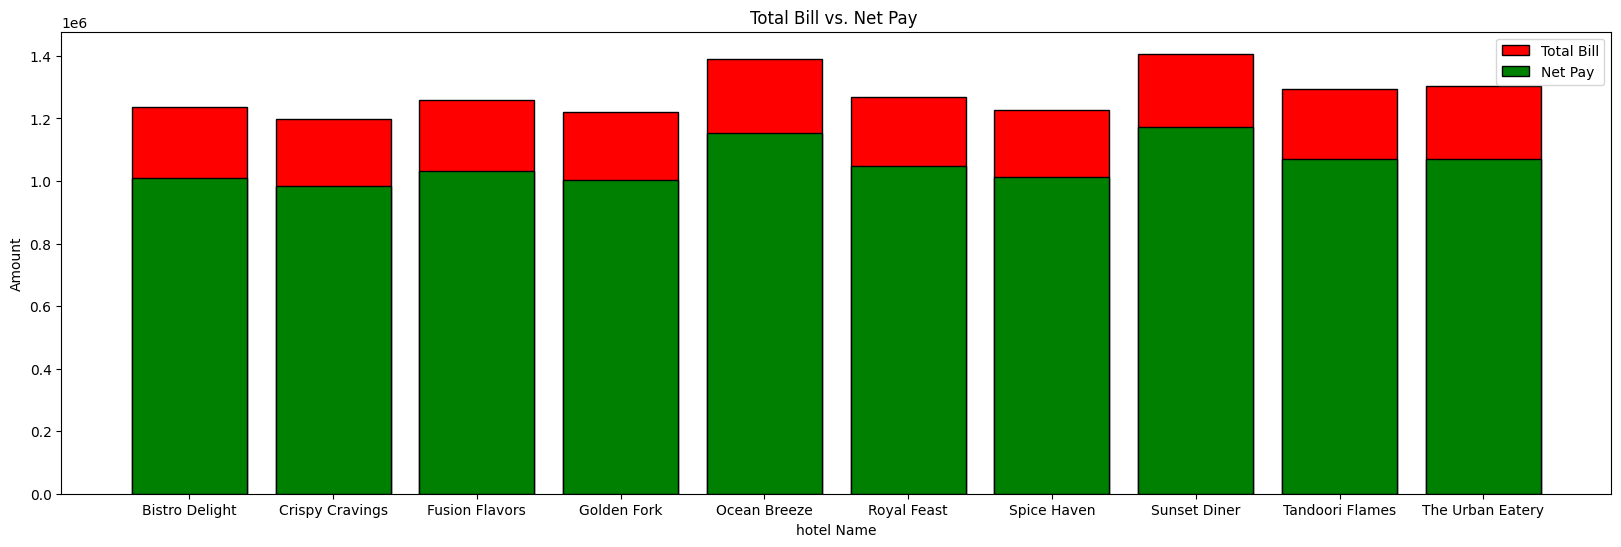

,Total_Bill,Net_Pay
Name,,
Bistro Delight,1236991.74,1010747.47
Crispy Cravings,1196968.01,983715.70
Fusion Flavors,1258015.85,1032575.79
Golden Fork,1221152.69,1002086.50
Ocean Breeze,1388666.72,1152881.14
Royal Feast,1269960.47,1046580.75
Spice Haven,1225574.58,1012468.96
Sunset Diner,1406975.67,1173847.59
Tandoori Flames,1292843.54,1070042.47


In [264]:
# Grouping the data by 'Name' and summing up 'Total_Bill' and 'Net_Pay'
bill_summary = data.groupby('Name')[['Total_Bill', 'Net_Pay']].sum()

# Creating a bar chart
plt.figure(figsize=(20, 6))

# Plotting Total Bill (Red) and Net Pay (Green) for each customer
plt.bar(bill_summary.index, bill_summary['Total_Bill'], color='red', edgecolor='black', label='Total Bill')
plt.bar(bill_summary.index, bill_summary['Net_Pay'], color='green', edgecolor='black', label='Net Pay')

# Adding labels and title for clarity
plt.xlabel("hotel Name")
plt.ylabel("Amount")
plt.title("Total Bill vs. Net Pay ")
plt.xticks(rotation=0)  # Rotating labels for better readability
plt.legend()  # Adding a legend to distinguish bars

# Display the plot
plt.show()
bill_summary

# vi.analyze and visualize the yearly total bill and net payment for each hotel?

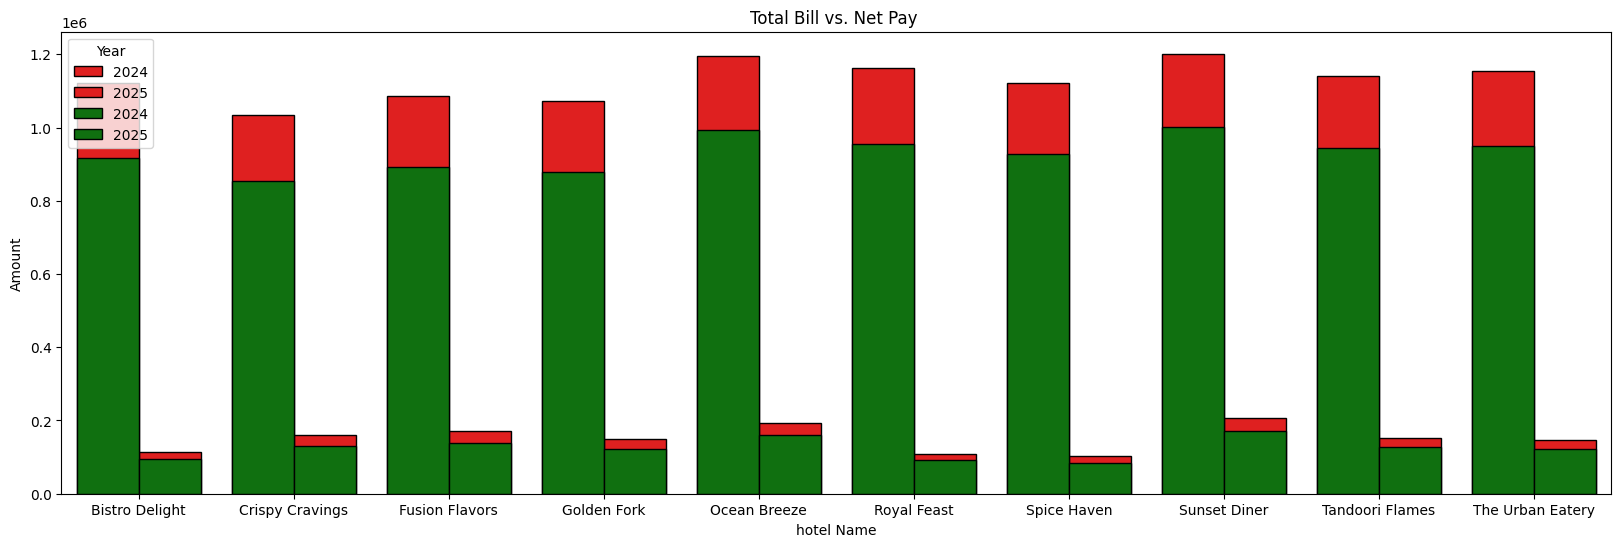

,Name,Year,Total_Bill,Net_Pay
0,Bistro Delight,2024,1122135.40,916307.74
1,Bistro Delight,2025,114856.34,94439.73
2,Crispy Cravings,2024,1035272.06,852578.06
3,Crispy Cravings,2025,161695.95,131137.64


In [245]:
# Extracting year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Grouping data by 'Name' and 'Year', summing up 'Total_Bill' and 'Net_Pay'
yearly_summary = data.groupby(['Name', 'Year'])[['Total_Bill', 'Net_Pay']].sum().reset_index()

# Creating a figure
plt.figure(figsize=(20, 6))

# Plotting Total Bill (Red) for each customer by Year
sns.barplot(data=yearly_summary, x='Name', y='Total_Bill', hue='Year', palette=['Red','red'], edgecolor='black')

# Plotting Net Pay (Green) on the same axis (using `dodge=False` to overlay)
sns.barplot(data=yearly_summary, x='Name', y='Net_Pay', hue='Year', palette=['Green','green'], edgecolor='black', alpha=1)

# Adding labels and title
plt.xlabel("hotel Name")
plt.ylabel("Amount")
plt.title("Total Bill vs. Net Pay ")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# Display top 4 customer-year records
yearly_summary.head(4)


# vii.visualize the distribution of ratings for each hotel

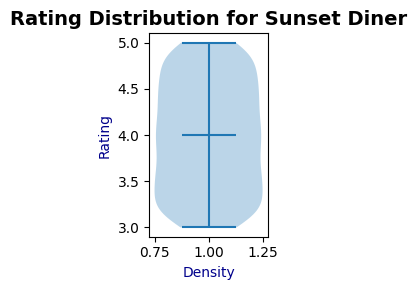

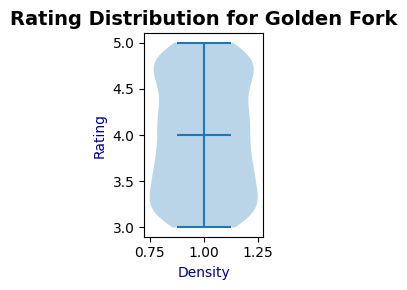

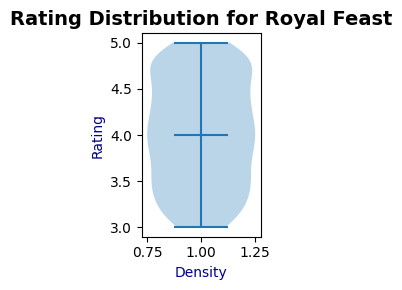

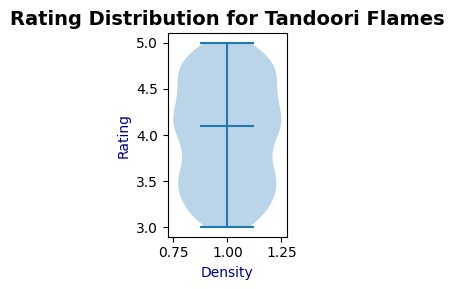

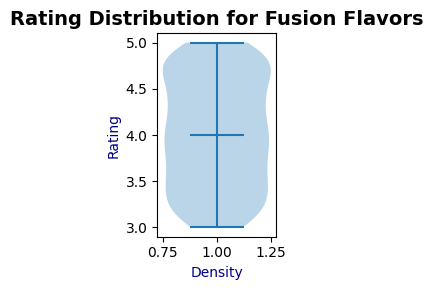

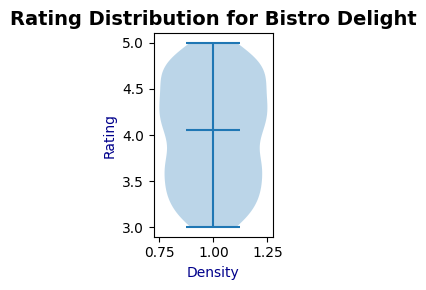

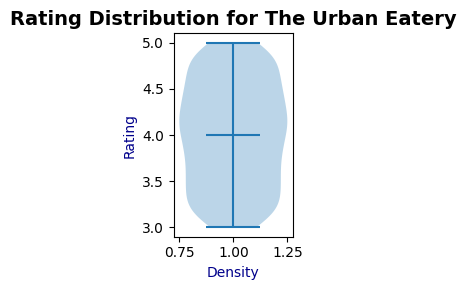

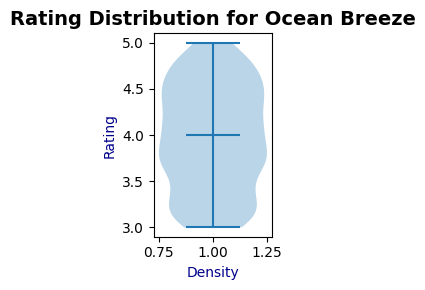

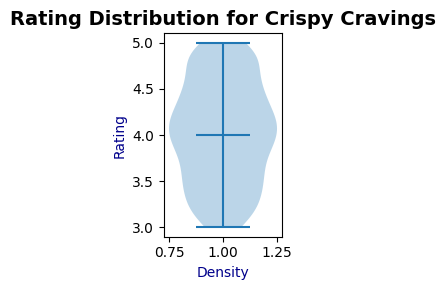

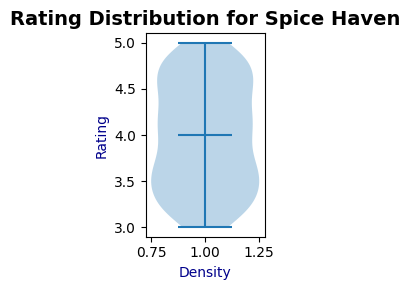

In [236]:
import matplotlib.pyplot as plt

# Extracting unique customer names
name = data['Name'].drop_duplicates().tolist()

# Creating a violin plot for each customer
for i in name:
    # Filter data for the current customer
    rate = data[data['Name'] == i]

    # Creating a new figure for each customer
    plt.figure(figsize=(2, 3))

    # Plotting the violin plot for the 'Rating' distribution
    plt.violinplot(rate['Rating'], showmedians=True)

    # Adding titles and labels
    plt.title(f'Rating Distribution for {i}', fontsize=14, weight='bold', color='black')
    plt.xlabel('Density', fontsize=10, color='darkblue')
    plt.ylabel('Rating', fontsize=10, color='darkblue')

    # Ensuring tight layout for proper spacing and Displaying the plot
    plt.tight_layout()
    plt.show()
   
